# Fourier transformations of audio signals

The Fourier transformation is a method of transforming between the frequency and time domains.

$$ f(t) \leftrightarrow F(\omega) $$

such that

$$ F(\omega) = \mathcal{F}(f(t))= \int_{-\infty}^{\infty} \mathcal{f}(t) \exp(-i\omega t) dt$$

This is a fundamental method for signal decomposition and its descrete implementation is important for practical signal processing and can be found in many other applications.

The purpose of this project is to gain experience with the use of the Fourier transform 

1. Apply the Fourier transform on a number of .wav sound files for examination of the component frequencies
1. Filter out some component frequencies to examine results

Further goals may be to

1. Implement the Fourier transform to work with a input stream from a audio recording device using the [`Soundevice`](https://python-sounddevice.readthedocs.io/en/0.5.1/) python library 

In [1]:
import os, sys
import audio_fft
import seaborn
import matplotlib.pyplot as plt

seaborn.set_style("whitegrid")
%matplotlib inline

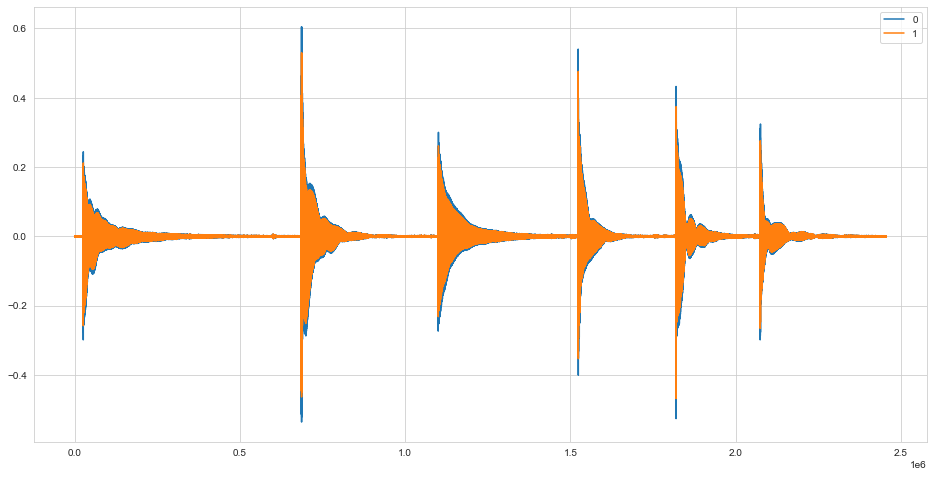

In [2]:
a_fft = audio_fft.AudioFFT()
a_fft.set_file(os.path.abspath(r"assets\123033__cgeffex__guitar_strings_take1.wav"))

a_fft.plot_data()
plt.show()

600000


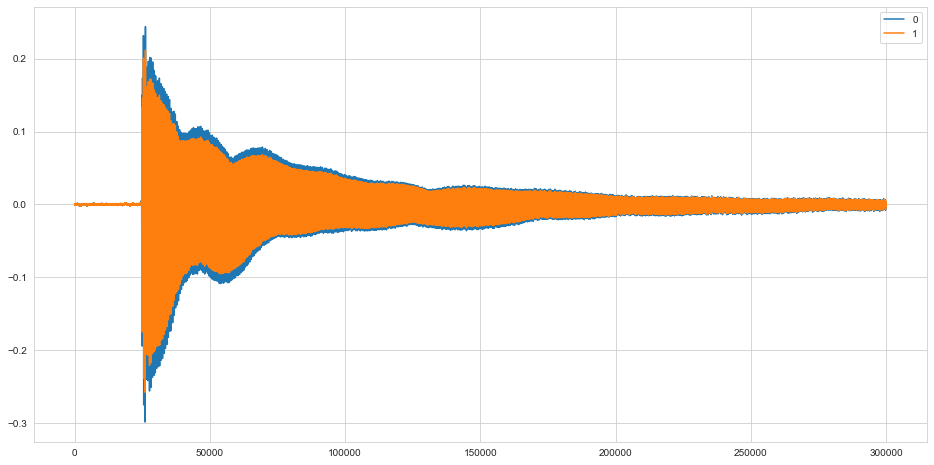

In [3]:
a_fft.slice_data(0, 0.3*1e6)
a_fft.plot_data()
print(a_fft.data.size)

We can perform a discrete fourier transform on this sound signal. This can be done using the [`numpy.fft`](https://numpy.org/doc/stable/reference/routines.fft.html#module-numpy.fft) module. Because this is a real valued signal, we have used an implementation of the `rfft` method.

We will also only use a single audio channel.

c:\Users\Siver\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


600000 150001


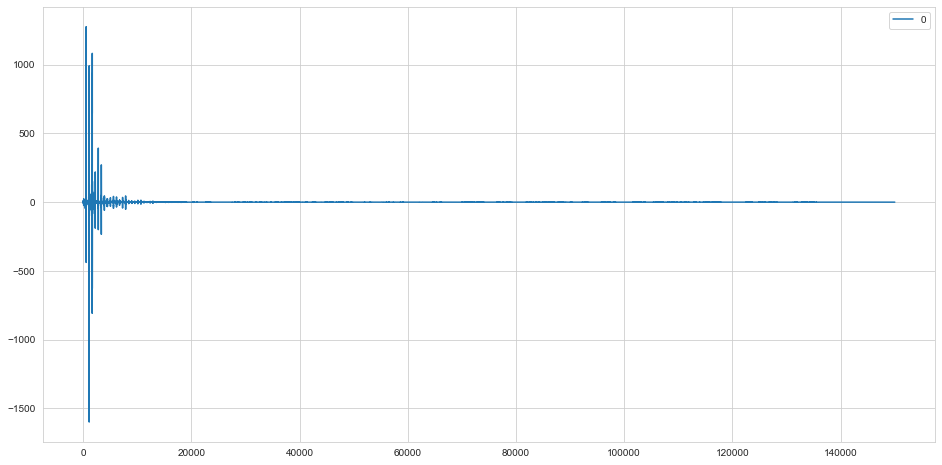

In [4]:
a_fft.perform_fft()
a_fft.plot_fdata()
print(a_fft.data.size, a_fft.fdata.size)

It can be seen that there is a lot of dead space of frequencies with very low intensity left over in the plot. This can be sliced of

7853 (-13.339173622219707+49.37865489357906j)


c:\Users\Siver\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


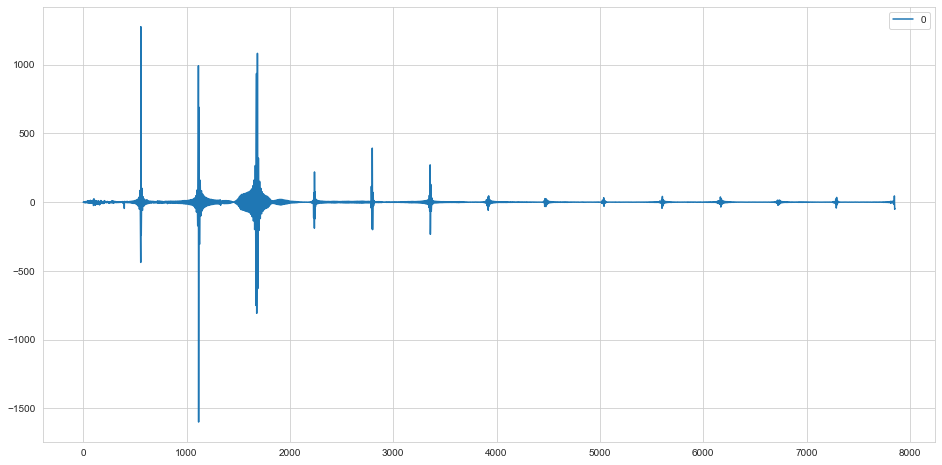

In [5]:
a_fft.trim_fdata(tol=50)
a_fft.plot_fdata()

The reverse process may be performed using the `irfft` method

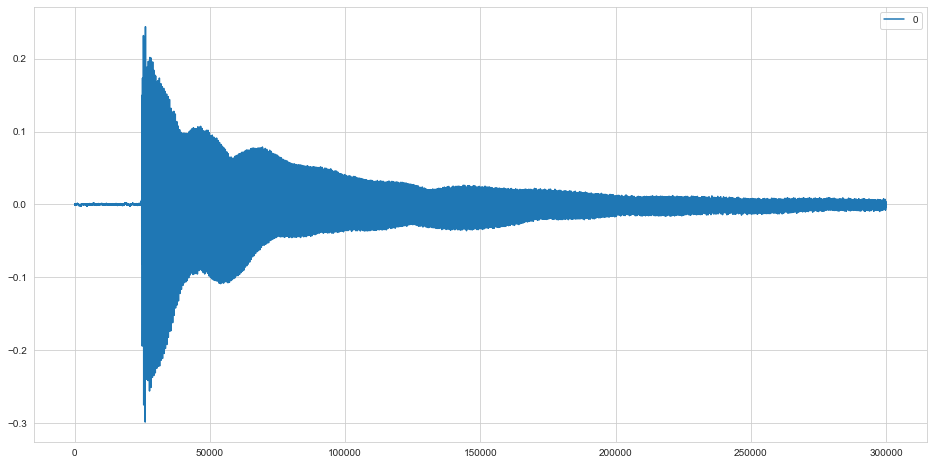

In [6]:
a_fft.perform_ifft()
a_fft.plot_idata()

It can be seen that this recreates the signal of the 0th channel of the original sound file.

Performing the inverse fourier transform on the trimmed signal yields

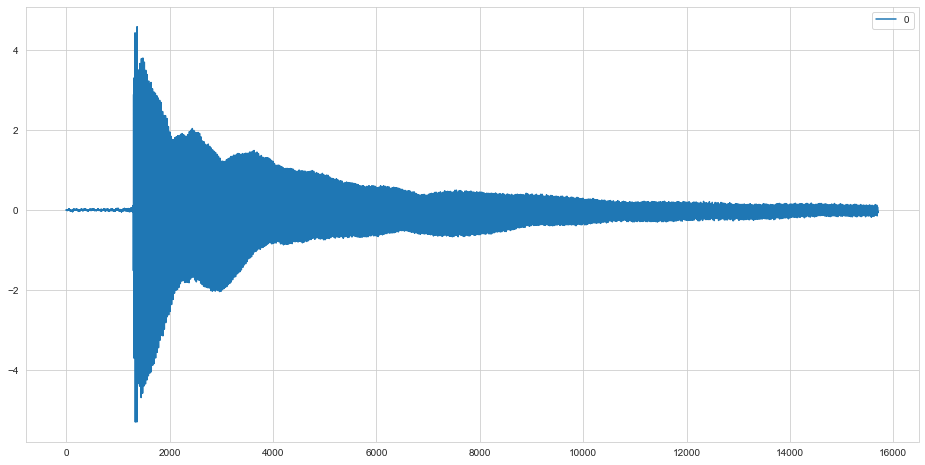

In [7]:
a_fft.perform_ifft(use_trimmed=True)
a_fft.plot_idata()

It can be seen that this has a similar shape to the untrimmed array, but with a greater magnitude, and fewer samples.

c:\Users\Siver\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


4910934 1227734


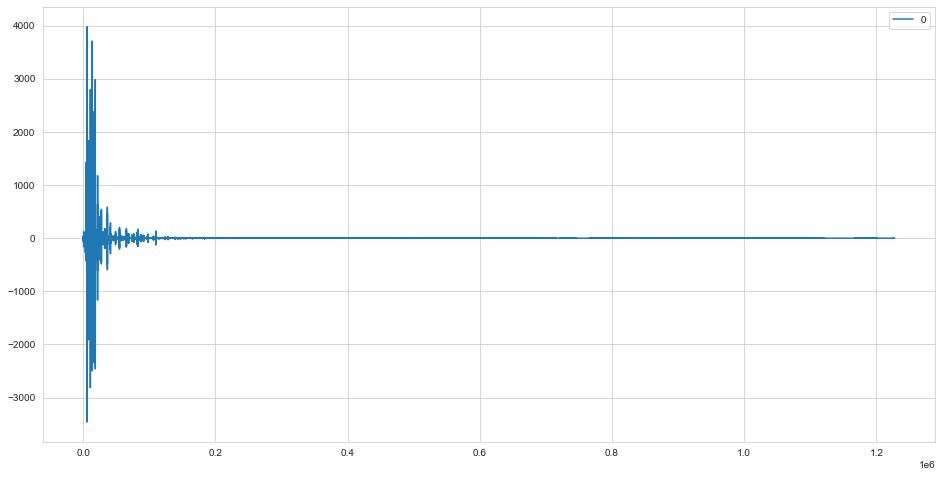

In [8]:
a_fft.slice_data()
a_fft.perform_fft()
a_fft.plot_fdata()
print(a_fft.data.size, a_fft.fdata.size)